<a href="https://colab.research.google.com/github/leo-areias/Data_Analysis/blob/main/Consumo_de_Cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [ ]:
cr = pd.read_csv("https://raw.githubusercontent.com/leoareias/Colab/main/consumo_cerveja.csv", delimiter = ";", decimal = ".")

In [ ]:
cr.head()

,Data,Temperatura_media,Temperatura_minima,Temperatura_maxima,final_de_semana,consumo
0,01/01/2015,27.30,23.9,32.5,0,25.461
1,02/01/2015,27.02,24.5,33.5,0,28.972
2,03/01/2015,24.82,22.4,29.9,1,30.814
3,04/01/2015,23.98,21.5,28.6,1,29.799
4,05/01/2015,23.82,21.0,28.3,0,28.900


In [ ]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                365 non-null    object 
 1   Temperatura_media   365 non-null    float64
 2   Temperatura_minima  365 non-null    float64
 3   Temperatura_maxima  365 non-null    float64
 4   final_de_semana     365 non-null    int64  
 5   consumo             365 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
y = cr['consumo']

In [ ]:
X = cr[['Temperatura_media', 'Temperatura_minima', 'Temperatura_maxima']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#dividir meus dados de treino e dados de testes de forma aleatória

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [ ]:
#instância do modelo de regressão
lr_model = LinearRegression()

In [ ]:
#treinando o modelo de regressão
lr_model.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
#visualizando os coeficientes do modelo de regressão linear multipla
lr_model.coef_

array([ 0.2235524 , -0.27279307,  0.57571227])

In [ ]:
#representação dos coeficientes
coefs = pd.DataFrame(lr_model.coef_, X.columns, columns=['coefs'])
coefs

,coefs
Temperatura_media,0.223552
Temperatura_minima,-0.272793
Temperatura_maxima,0.575712


In [ ]:
#predizendo 10 preços
lr_model.predict(X_teste)[-10:]

array([23.20447269, 27.08631339, 28.7146957 , 22.69809123, 23.21765412,
       25.66724841, 25.41399308, 25.79600591, 24.27437321, 23.71707813])

In [ ]:
#visualizando dados reaias
y_teste[-10:]

198    24.827
320    26.964
356    26.468
294    23.065
139    19.525
158    26.150
229    23.070
360    32.307
209    22.522
328    25.119
Name: consumo, dtype: float64

In [ ]:
#predição dos dados
predict = lr_model.predict(X_teste)

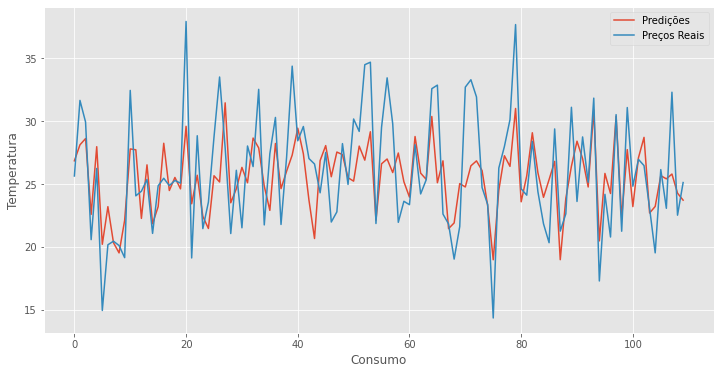

In [ ]:
#aderencia entre o predito e treino, eixo x é o valor efetivo de votos e eixo Y o resultado dos testes
%matplotlib inline
predicoes = pd.DataFrame(lr_model.predict(X_teste))
y_teste = pd.DataFrame(y_teste.values)

plt.style.use("ggplot")
plt.figure(figsize=(12,6))
plt.xlabel('Consumo')
plt.ylabel('Valores Preditos')
plt.ylabel('Temperatura')
plt.plot(predicoes)
plt.plot(y_teste)

#plt.scatter(y_teste, predicoes)
plt.legend(['Predições', 'Preços Reais'])

<ipython-input-42-47f21ab8e9a8>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

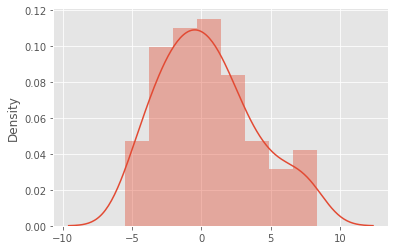

In [ ]:
#distribuição normal dos valores previstos, o modelo tem um grande desvio padrão
%matplotlib inline

predicoes = pd.DataFrame(lr_model.predict(X_teste))
y_teste = pd.DataFrame(y_teste.values)
sns.distplot((y_teste-predicoes))

In [ ]:
#erro médio
#quanto mais próximo de 0 melhor
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_teste, lr_model.predict(X_teste)))
print('MAE:', metrics.mean_absolute_error(y_teste, lr_model.predict(X_teste)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, lr_model.predict(X_teste))))

MSE 12.027741821429734
MAE: 2.7691933532981823
RMSE: 3.4681034905881534


In [ ]:
print('MSE', metrics.mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5)

MSE 3.4681034905881534
